<a href="https://colab.research.google.com/github/adunpdg82/project-sreamlite/blob/main/analisa_air_Polutan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Proyek Analisis Data: PRSA_Data_Gucheng_20130301-20170228.csv


---


*   Nama: Ardi Ma'ruf
*   Email: adun_pdg82@yahoo.co.id
*   ID Dicoding: ardi_data_scientist




## PERTANYAAN ANALITIS
---

1.   Pertanyaan 1 : Apa tingkat polutan udara yang paling tinggi di Ghucheng dari tahun 2023 sampai tahun 2017?

2.   Bagaimana kualitas udara selama periode waktu tertentu (harian), (bulanan), dan (tahunan)?

Menyiapkan library yang dibutuhkan

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Menyiapkan data set serta menampilkan preview tabel agar dapat dimengerti data apa yang akan di olah

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv('/content/drive/MyDrive/Analisa_Data_Python/PRSA_Data_Gucheng_20130301-20170228.csv')

df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,6.0,18.0,5.0,NaN,800.0,88.0,0.1,1021.1,-18.6,0.0,NW,4.4,Gucheng
1,2,2013,3,1,1,6.0,15.0,5.0,NaN,800.0,88.0,-0.3,1021.5,-19.0,0.0,NW,4.0,Gucheng
2,3,2013,3,1,2,5.0,18.0,NaN,NaN,700.0,52.0,-0.7,1021.5,-19.8,0.0,WNW,4.6,Gucheng
3,4,2013,3,1,3,6.0,20.0,6.0,NaN,NaN,NaN,-1.0,1022.7,-21.2,0.0,W,2.8,Gucheng
4,5,2013,3,1,4,5.0,17.0,5.0,NaN,600.0,73.0,-1.3,1023.0,-21.4,0.0,WNW,3.6,Gucheng


Menampilkan info dari tabel tersebut

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Assessing Data

In [8]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nSummary Statistics:")
print(df.describe())

Number of rows: 35064
Number of columns: 18

Summary Statistics:
                 No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1

Memeriksa data yang hilang (missing)

In [9]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64


Memeriksa tipe data yang hilang

In [10]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64


Membersihkan data (Cleaning Data)

In [11]:
df.dropna(inplace=True)

def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\n NUmber of features:", df.shape[1])
    print("\n Features:")
    print(df.columns.tolist())
    print("\n Missing Values:", df.isna().sum().values.sum())
    print("\n Unique values:")
    print(df.nunique())

dataoverview(df,'Overview of the Dataset')

Overview of the Dataset:

Rows: 32504

 NUmber of features: 18

 Features:
['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

 Missing Values: 0

 Unique values:
No         32504
year           5
month         12
day           31
hour          24
PM2.5        571
PM10         650
SO2          194
NO2          243
CO           115
O3           568
TEMP         971
PRES         590
DEWP         594
RAIN         122
wd            16
WSPM         101
station        1
dtype: int64


Exploratory Data Analysis (EDA)

In [12]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

most_common_pollutants = {}
for pollutant in pollutants:
    most_common_pollutant = df[pollutant].mode().values[0]
    most_common_pollutants[pollutant] = most_common_pollutant

print("Polutan Udara:")
for pollutant, value in most_common_pollutants.items():
    print(f"{pollutant}: {value}")

Polutan Udara:
PM2.5: 8.0
PM10: 6.0
SO2: 2.0
NO2: 12.0
CO: 300.0
O3: 2.0


Polusi yang paling tinggi

In [13]:
pollutant_counts = {}
for pollutant in pollutants:
    count = df[pollutant].mode().values[0]
    pollutant_counts[pollutant] = count

# Menentukan polutan udara yang paling umum
most_common_pollutant = max(pollutant_counts, key=pollutant_counts.get)

print(f"Polutan Udara Paling tinggi dalam Dataset adalah: {most_common_pollutant}")

Polutan Udara Paling tinggi dalam Dataset adalah: CO


### Visualization & Explanatory Analysis

Menjawab pertanyaan pertama yaitu polutan yang paling tinggi

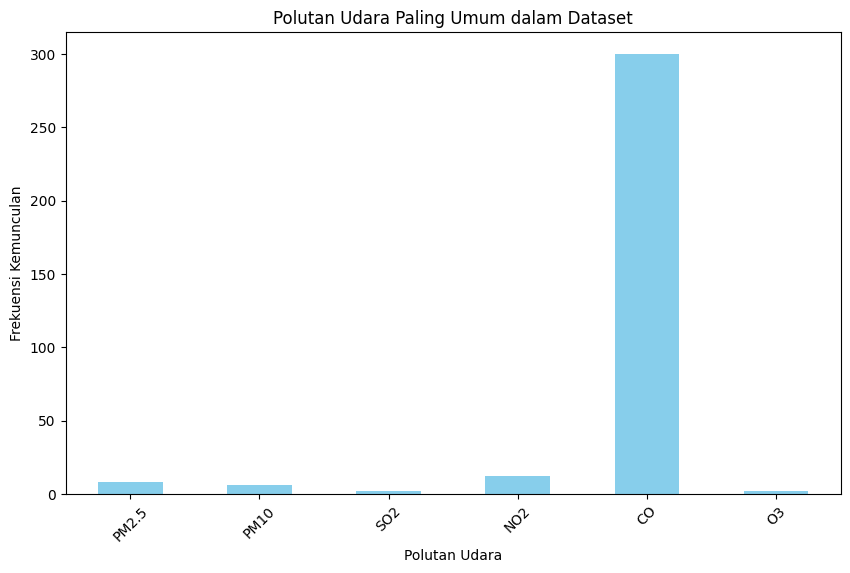

In [14]:
pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

pollutant_counts = df[pollutants].mode().iloc[0]

plt.figure(figsize=(10, 6))
pollutant_counts.plot(kind='bar', color='skyblue')
plt.title('Polutan Udara Paling Umum dalam Dataset')
plt.xlabel('Polutan Udara')
plt.ylabel('Frekuensi Kemunculan')
plt.xticks(rotation=45)
plt.show()

Menjawab pertanyaan kedua Bagaimana kualitas udara selama periode waktu tertentu (harian), (bulanan), dan (tahunan)?

## Kualitas udara harian

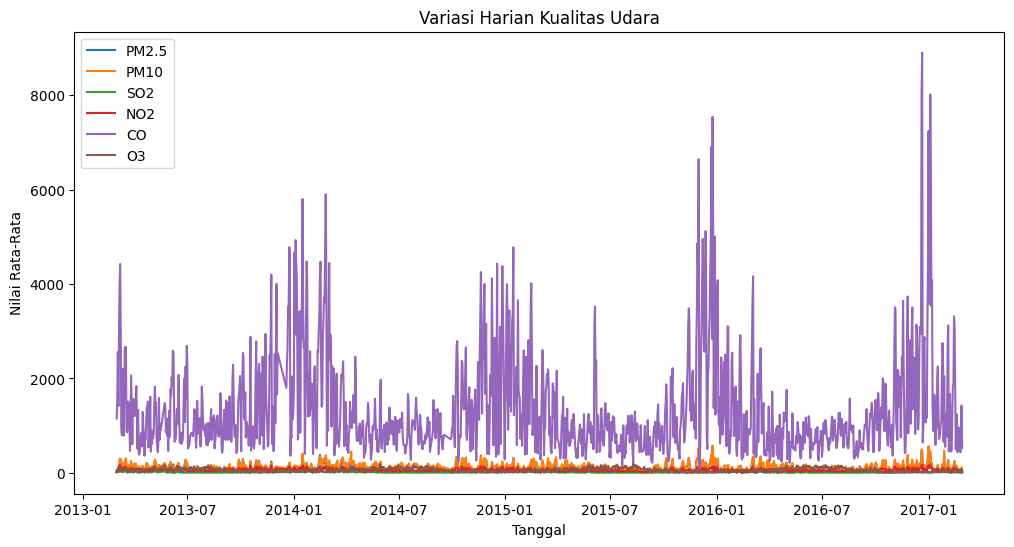

In [15]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

daily_data = df.groupby('date').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

plt.figure(figsize=(12, 6))
for column in daily_data.columns:
    plt.plot(daily_data.index, daily_data[column], label=column)

plt.title('Variasi Harian Kualitas Udara')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()


## Kualitas udara Bulanan

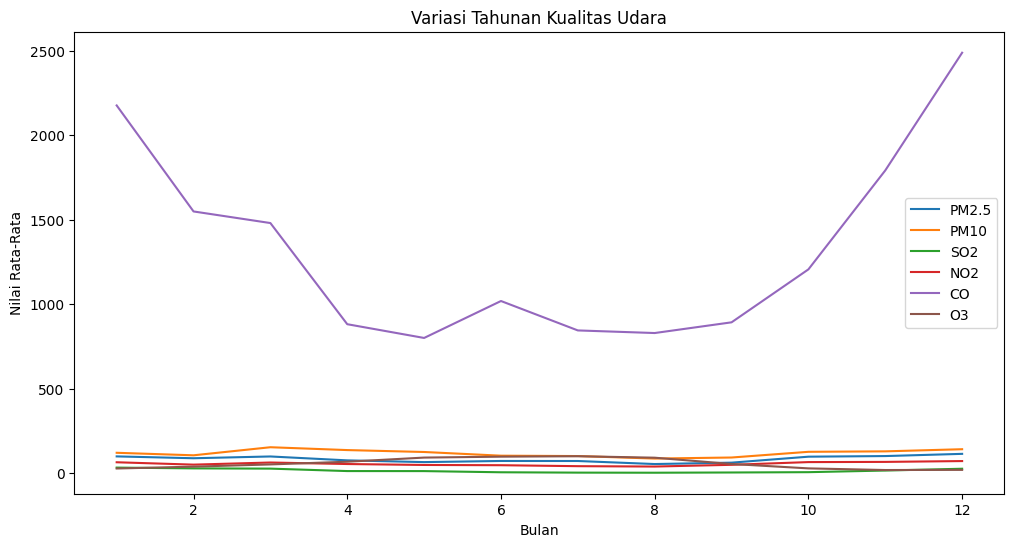

In [16]:
annual_data = df.groupby('month').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

plt.figure(figsize=(12, 6))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column)

plt.title('Variasi Tahunan Kualitas Udara')
plt.xlabel('Bulan')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()

## Kualitas uadara Tahunan

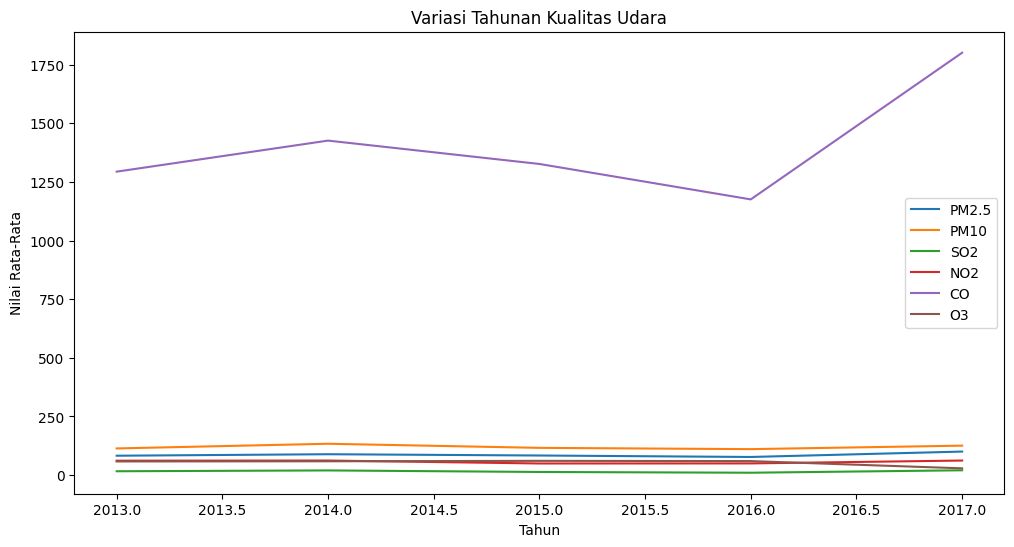

In [17]:
annual_data = df.groupby('year').agg({'PM2.5': 'mean', 'PM10': 'mean', 'SO2': 'mean', 'NO2': 'mean', 'CO': 'mean', 'O3': 'mean'})

plt.figure(figsize=(12, 6))
for column in annual_data.columns:
    plt.plot(annual_data.index, annual_data[column], label=column)

plt.title('Variasi Tahunan Kualitas Udara')
plt.xlabel('Tahun')
plt.ylabel('Nilai Rata-Rata')
plt.legend()
plt.show()